In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.metrics import confusion_matrix,classification_report,log_loss,accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import utils
import warnings
warnings.filterwarnings('ignore')

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)



## 1. About the Dataset

### 1.1 Loading the Dataset

**Dataset**: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

In [2]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                



### 1.1 Dataset Glossary:

There are 25 columns , and all the columns contains not-null values.

**Patient ID** - Unique identifier for each patient, which is stored as string.

__Age__ - Age of the patient, which is stored as integer.

**Sex** - Gender of the patient (Male/Female), which is stored as string.

**Cholesterol** - Cholesterol levels of the patient, which is stored as integer.

**Blood Pressure** - Blood pressure of the patient (systolic/diastolic), which is stored as string.

**Heart Rate** - Heart rate of the patient, which is stored as integer.

**Diabetes** - Whether the patient has diabetes (Yes/No), which is stored as integer.

**Family History** - Family history of heart-related problems (1: Yes, 0: No), which is stored as integer.

**Smoking** - Smoking status of the patient (1: Smoker, 0: Non-smoker), which is stored as integer.

**Obesity** - Obesity status of the patient (1: Obese, 0: Not obese), which is stored as integer.

**Alcohol Consumption** - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy), which is stored as integer.

**Exercise Hours Per Week** - Number of exercise hours per week, which is stored as float.

**Diet** - Dietary habits of the patient (Healthy/Average/Unhealthy), which is stored as string.

**Previous Heart Problems** - Previous heart problems of the patient (1: Yes, 0: No), which is stored as integer.

**Medication Use** - Medication usage by the patient (1: Yes, 0: No), which is stored as integer.

**Stress Level** - Stress level reported by the patient (1-10), which is stored as integer.

**Sedentary Hours Per Day** - Hours of sedentary activity per day, which is stored as float.

**Income** - Income level of the patient, which is stored as integer.

**BMI** - Body Mass Index (BMI) of the patient, which is stored as float.

**Triglycerides** - Triglyceride levels of the patient, which is stored as integer.

**Physical Activity Days Per Week** - Days of physical activity per week, which is stored as integer.

**Sleep Hours Per Day** - Hours of sleep per day, which is stored as integer.

**Country** - Country of the patient, which is stored as string.

**Continent** - Continent where the patient resides, which is stored as string.

**Hemisphere** - Hemisphere where the patient resides, which is stored as string

**Heart Attack Risk** - Presence of heart attack risk (1: Yes, 0: No), which is stored as integer. target output.

### 1.2 Descriptive Statistics of Numerical Features of the Dataset

In [4]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


### 1.3 EDA Analysis

In [5]:
# Creating two new columns 'SystolicBP' and 'DiastolicBP'
df[['SystolicBP', 'DiastolicBP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df['MAP'] = (df['SystolicBP'] + 2 * df['DiastolicBP']) / 3  #Mean Arterial Pressure (MAP): MAP is the average pressure in a person's arteries during one heartbeat. also reflect the health of the arteries
df['PulsePressure'] = df['SystolicBP'] - df['DiastolicBP'] #numerical difference between systolic and diastolic blood pressure. It can give insights into the condition of the arteries.
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,SystolicBP,DiastolicBP,MAP,PulsePressure
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,0,6,Argentina,South America,Southern Hemisphere,0,158,88,111.333333,70
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,1,7,Canada,North America,Northern Hemisphere,0,165,93,117.000000,72
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,4,4,France,Europe,Northern Hemisphere,0,174,99,124.000000,75
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,3,4,Canada,North America,Northern Hemisphere,0,163,100,121.000000,63
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,89.000000,3


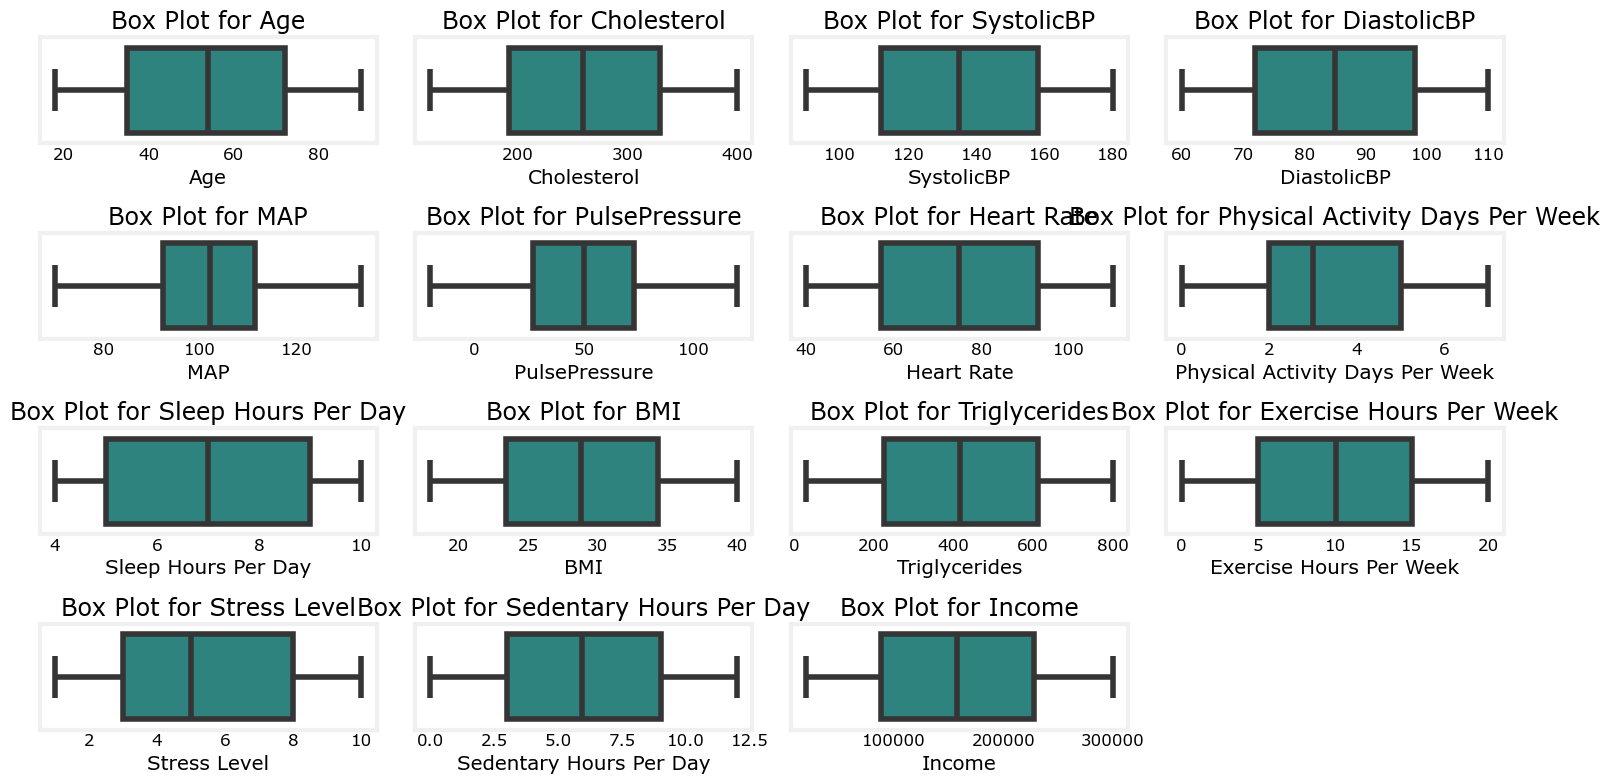

In [6]:
# to check existence of outliers in each column
numeric_columns = ['Age','Cholesterol','SystolicBP','DiastolicBP','MAP','PulsePressure','Heart Rate','Physical Activity Days Per Week','Sleep Hours Per Day','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Sedentary Hours Per Day','Income']

# Adjust the grid size based on the number of columns or select a subset to visualize
num_plots = len(numeric_columns)
num_rows = 4
num_cols = 4

plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    if i <= num_rows * num_cols:  # Ensure it stays within the specified grid size
        plt.subplot(num_rows, num_cols, i)
        sns.boxplot(x=column, data=df, palette="viridis")
        plt.title(f"Box Plot for {column}")

plt.tight_layout()
plt.show()


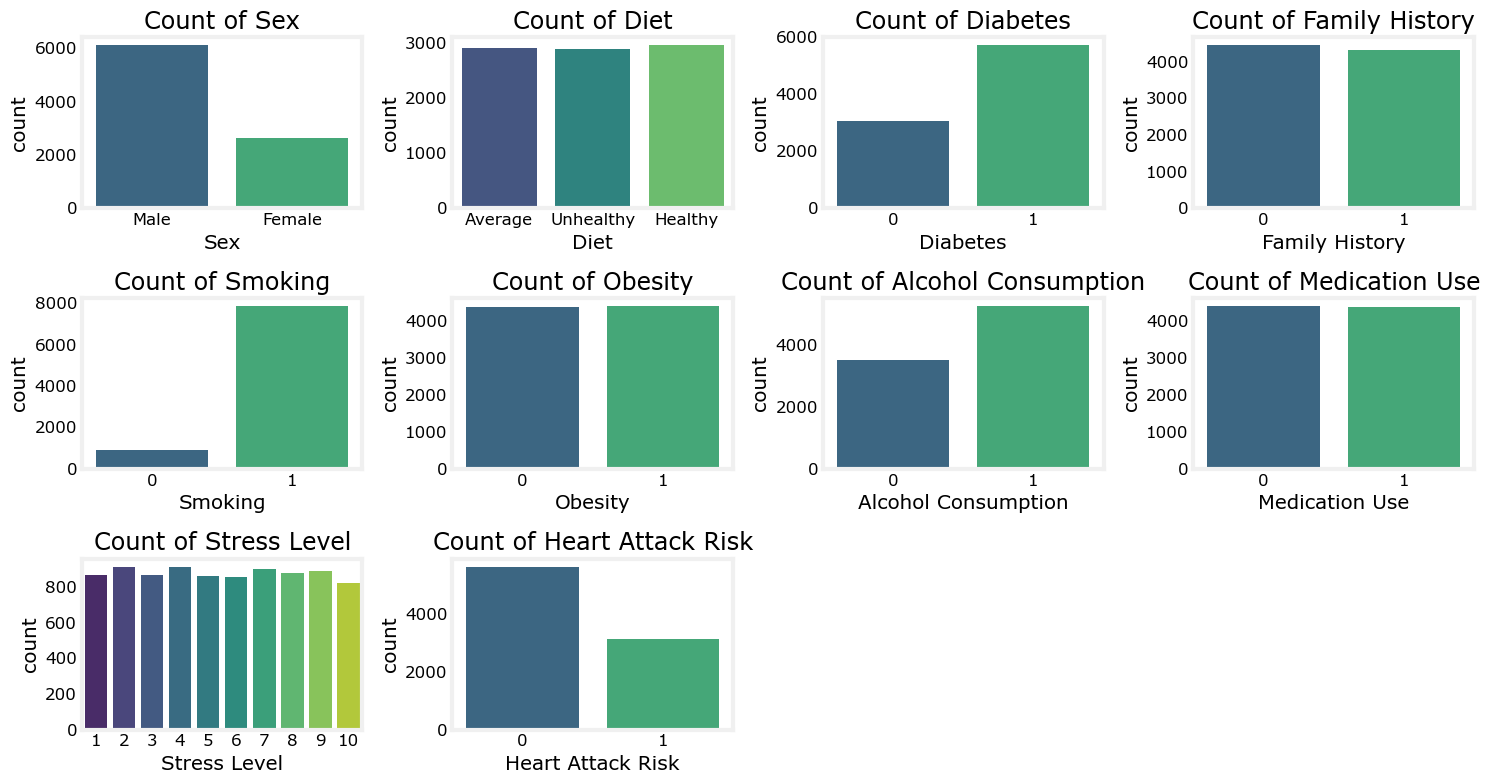

In [7]:
# To check existence of data imbalance
catogorical_columns = ["Sex","Diet","Diabetes","Family History","Smoking","Obesity","Alcohol Consumption","Medication Use","Stress Level","Heart Attack Risk"]

plt.figure(figsize=(15, 8))
for i, column in enumerate(catogorical_columns,1):
    plt.subplot(3, 4, i)
    sns.countplot(x=column, data=df, palette="viridis")
    plt.title(f"Count of {column}")
plt.tight_layout()
plt.show()

### Over Sampling Techniques to Tackle Data Imbalance

In [8]:
# !pip install imbalanced-learn


In [9]:
from imblearn.over_sampling import RandomOverSampler

In [10]:
# Assuming your dataset is in a DataFrame named 'data'
# Separate features and target variable
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Instantiate RandomOverSampler to handle imbalance by oversampling the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Heart Attack Risk')], axis=1)
resampled_data.head(10)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,SystolicBP,DiastolicBP,MAP,PulsePressure,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,0,6,Argentina,South America,Southern Hemisphere,158,88,111.333333,70,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,1,7,Canada,North America,Northern Hemisphere,165,93,117.000000,72,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,4,4,France,Europe,Northern Hemisphere,174,99,124.000000,75,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,3,4,Canada,North America,Northern Hemisphere,163,100,121.000000,63,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1,5,Thailand,Asia,Northern Hemisphere,91,88,89.000000,3,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,5,10,Germany,Europe,Northern Hemisphere,172,86,114.666667,86,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,4,10,Canada,North America,Northern Hemisphere,102,73,82.666667,29,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,6,7,Japan,Asia,Northern Hemisphere,131,68,89.000000,63,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,7,4,Brazil,South America,Southern Hemisphere,144,105,118.000000,39,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,7,7,Japan,Asia,Northern Hemisphere,160,70,100.000000,90,0


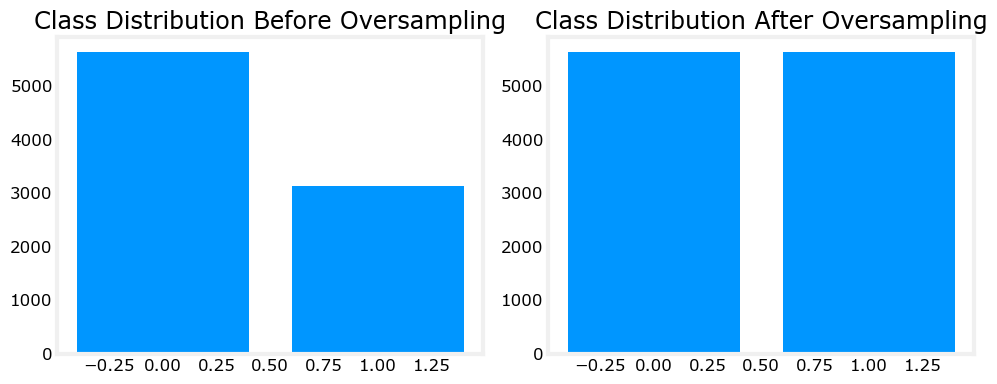

In [11]:

# Count class instances before oversampling
class_counts_before = df['Heart Attack Risk'].value_counts()

# Count class instances after oversampling
class_counts_after = resampled_data['Heart Attack Risk'].value_counts()  # Assuming 'resampled_data' is the oversampled dataset

# Plotting class distribution before and after oversampling
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(class_counts_before.index, class_counts_before.values)
plt.title('Class Distribution Before Oversampling')

plt.subplot(1, 2, 2)
plt.bar(class_counts_after.index, class_counts_after.values)
plt.title('Class Distribution After Oversampling')

plt.tight_layout()
plt.show()



In [12]:
# Columns with imbalanced classes (excluding the target variable)
columns_with_imbalance = ['Sex', 'Diabetes', 'Smoking', 'Alcohol Consumption']

# Oversampling for each specified column
for column in columns_with_imbalance:
    # Separate features and target variable for the specific column
    X = df.drop(columns_with_imbalance, axis=1)
    y = df[column]
    
    # Instantiate RandomOverSampler for the specific column
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    # Convert the resampled data back to a DataFrame
    resampled_data_col = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=column)], axis=1)
    
    # Further processing or usage of resampled_data_col
    # For example: resampled_data_col could be used for training machine learning models


In [13]:
df['Sex'].value_counts()[1]

2652

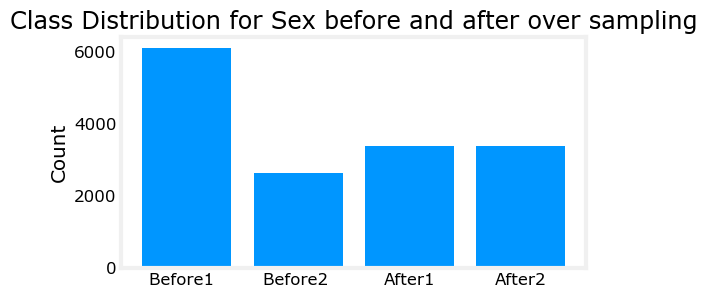

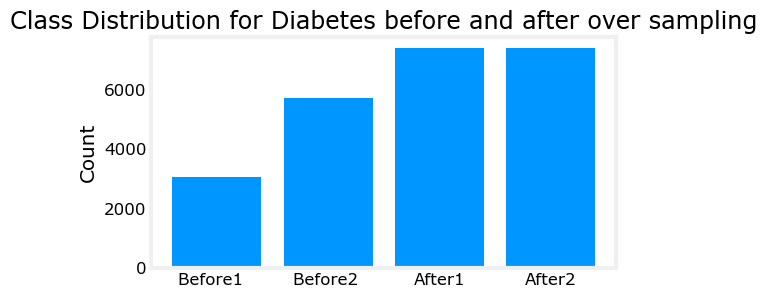

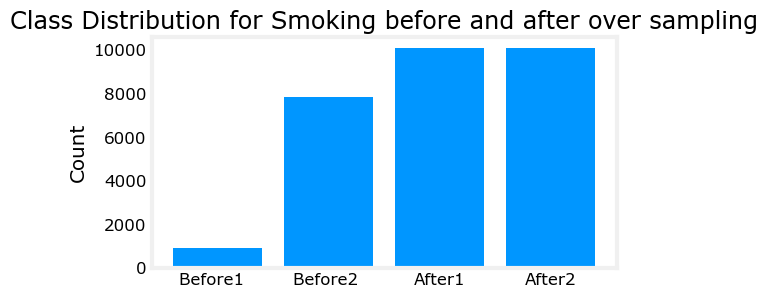

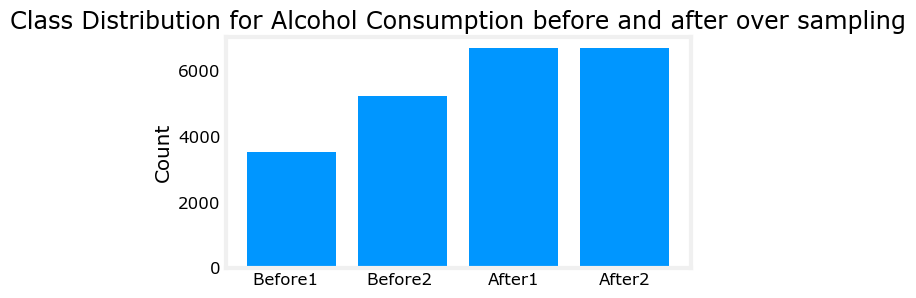

In [14]:
for column in columns_with_imbalance:
    # Get counts before and after oversampling for the specific column
    counts_before = df[column].value_counts()
    counts_after = resampled_data[column].value_counts()
    
    # Creating labels for the bars
    labels = ['Before1  ', 'Before2 ','After1','After2']
    
    # Creating corresponding height values for the bars
    heights = [counts_before[0],counts_before[1],counts_after[1], counts_after[1]]  # Assuming 0 represents one class and 1 represents the other
    
    # Plotting the bar plot
    plt.figure(figsize=(6, 3))
    plt.bar(labels, heights)
    plt.title(f'Class Distribution for {column} before and after over sampling')
    plt.ylabel('Count')
    plt.show()

In [15]:
resampled_data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,SystolicBP,DiastolicBP,MAP,PulsePressure,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,0,6,Argentina,South America,Southern Hemisphere,158,88,111.333333,70,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,1,7,Canada,North America,Northern Hemisphere,165,93,117.000000,72,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,4,4,France,Europe,Northern Hemisphere,174,99,124.000000,75,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,3,4,Canada,North America,Northern Hemisphere,163,100,121.000000,63,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1,5,Thailand,Asia,Northern Hemisphere,91,88,89.000000,3,0


In [16]:
# numeric_columns = resampled_data.select_dtypes(include=['number'])

# correlation_matrix = numeric_columns.corr()

# # Calculate correlations between all variables and 'Heart Attack Risk'
# corr_to_hrisk = correlation_matrix['Heart Attack Risk']

# # Sort by magnitude(we care more about impact)
# corr_to_hrisk = corr_to_hrisk.drop('Heart Attack Risk')  # Remove the correlation with itself
# corr_to_hrisk = corr_to_hrisk.abs().sort_values(ascending=False)

# # Create our color map for both positive and negative
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plt.figure(figsize=(10, 8))

# # Let's make our heatmap (sorted by absolute value)
# sns.heatmap(
#     correlation_matrix.loc[corr_to_hrisk.index, ['Heart Attack Risk']],
#     annot=True,
#     cmap=cmap,
#     fmt=".6f",
#     center=0, 
# )

# plt.title('Correlation with Heart Attack Risk')
# plt.show()

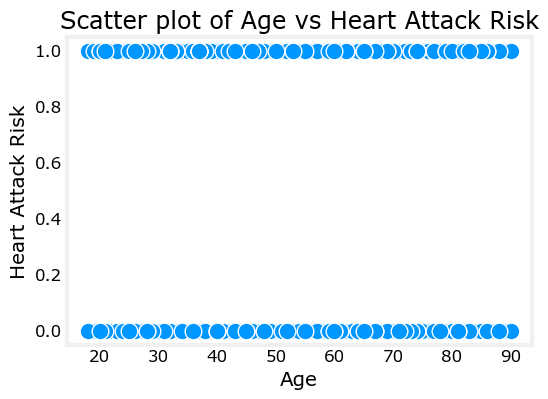

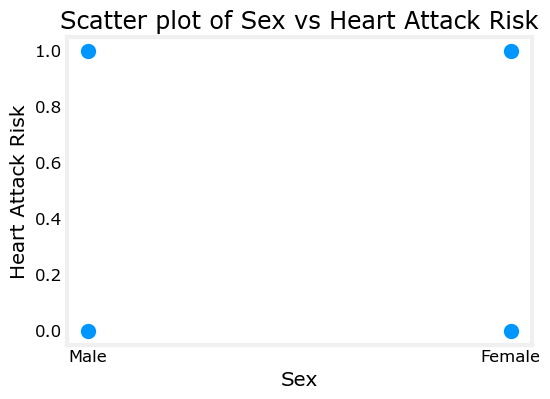

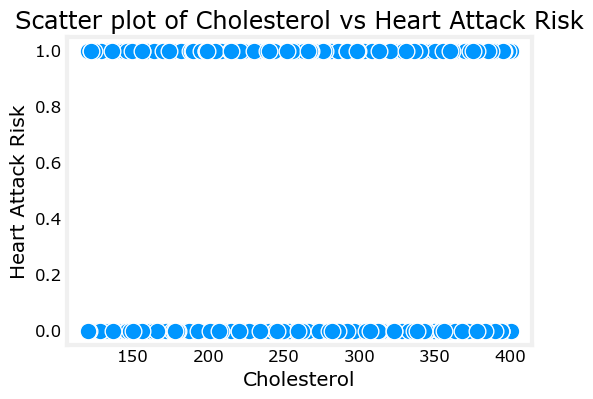

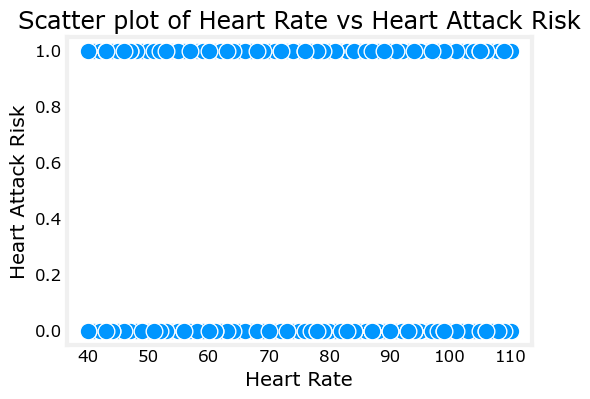

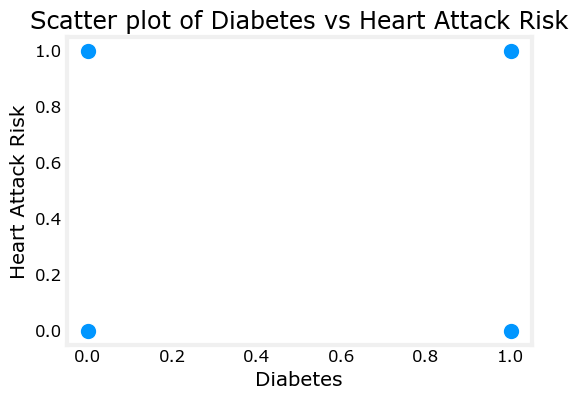

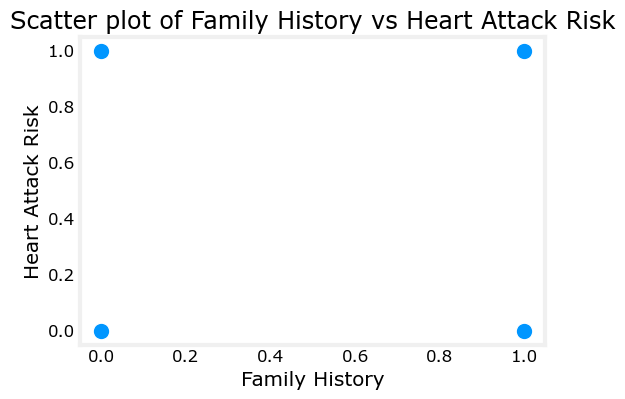

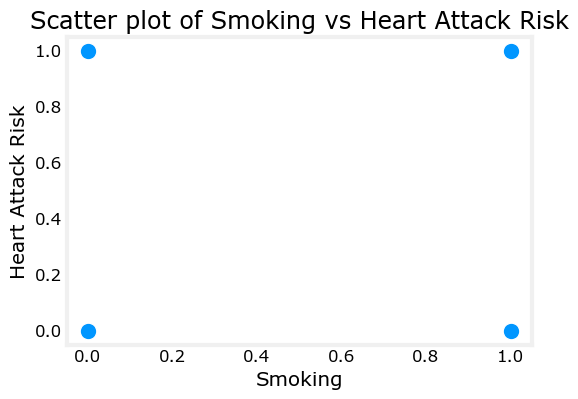

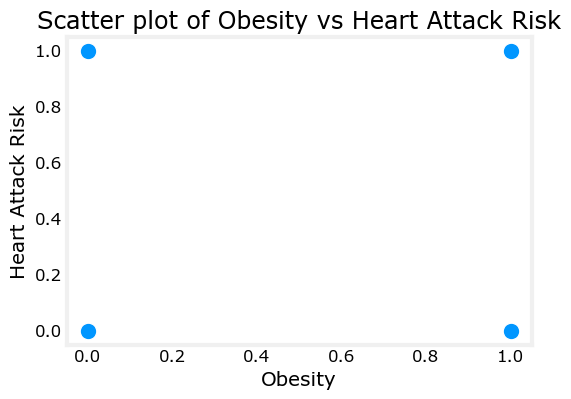

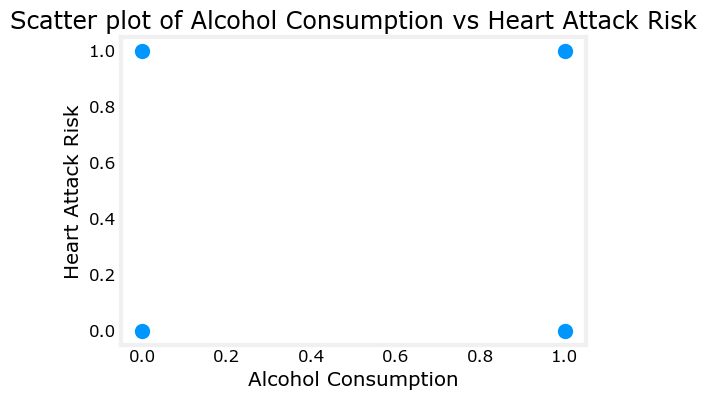

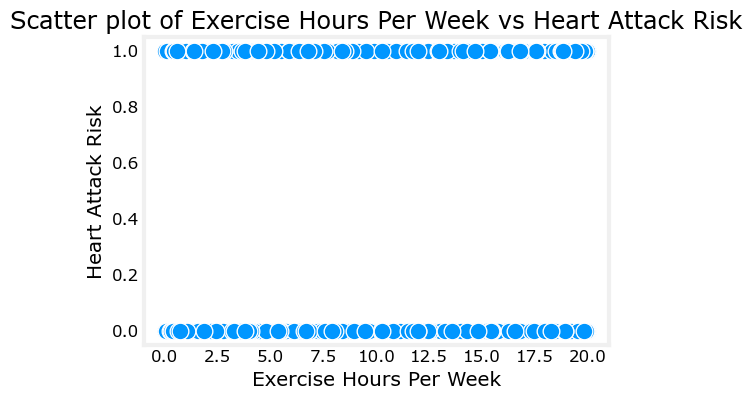

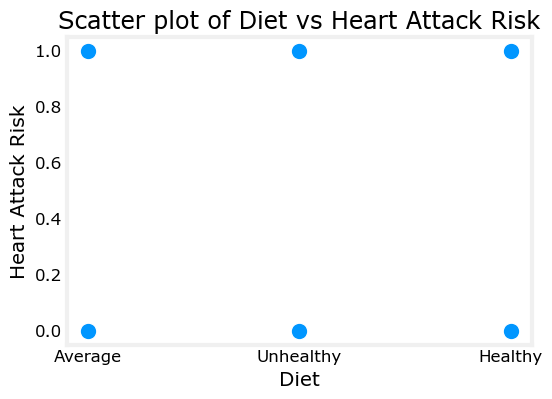

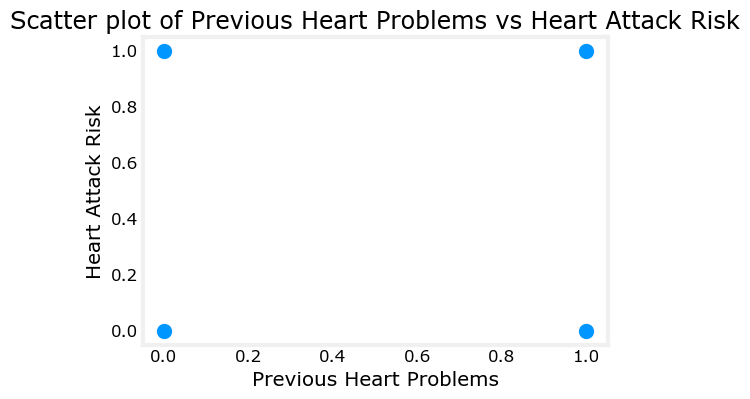

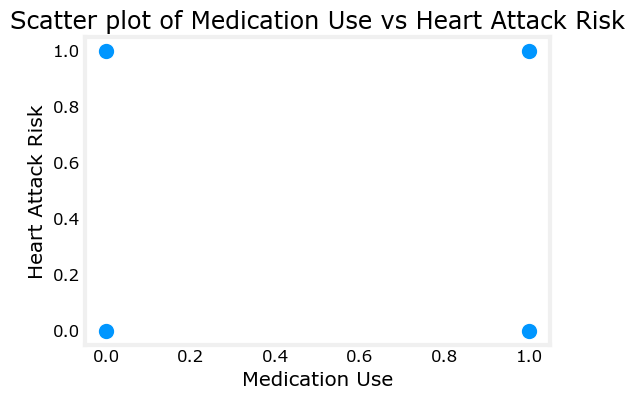

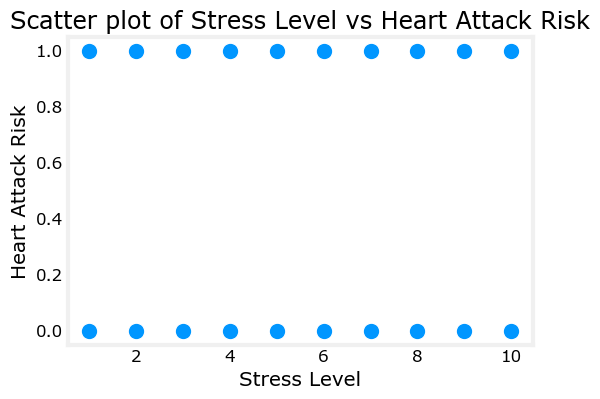

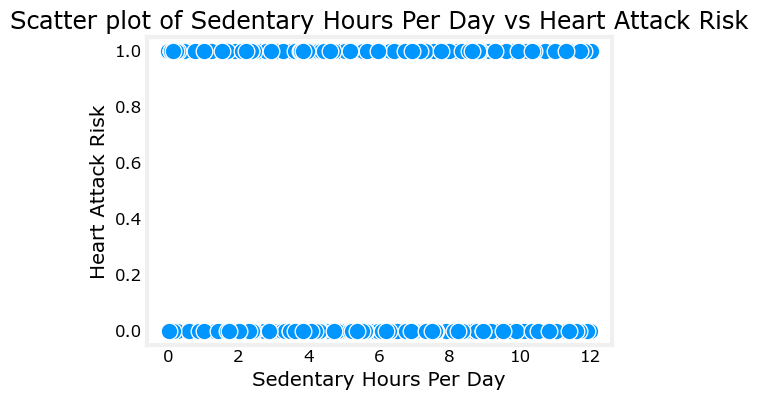

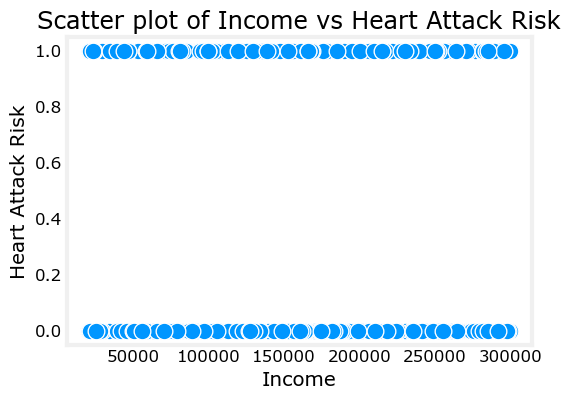

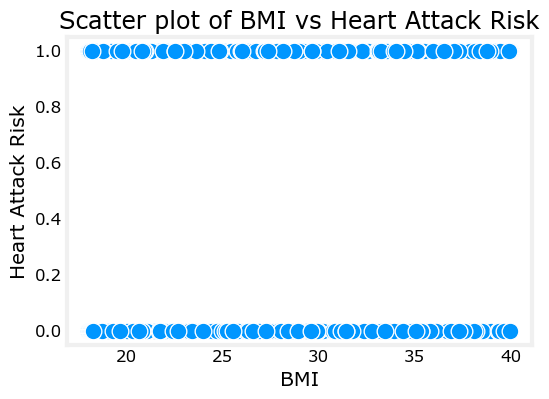

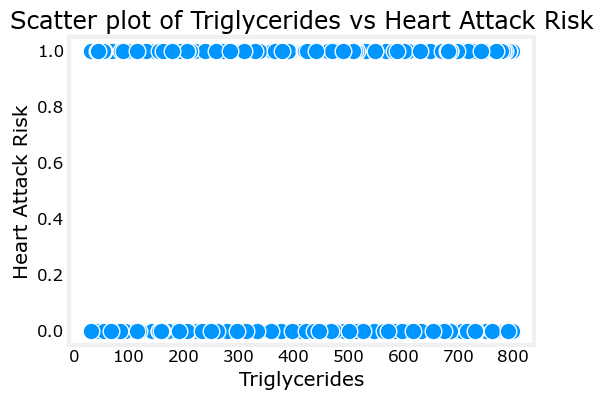

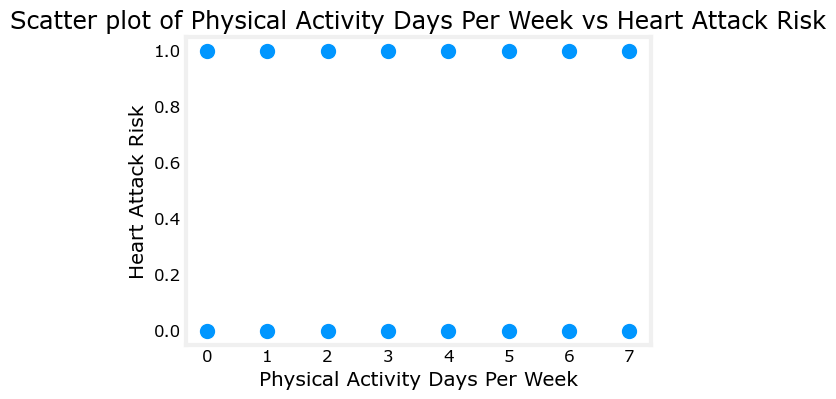

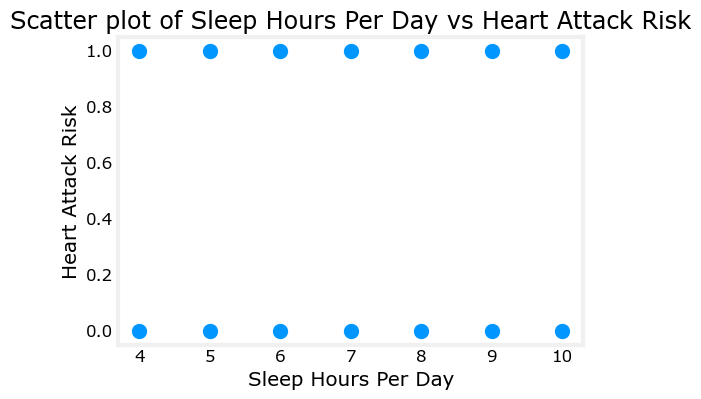

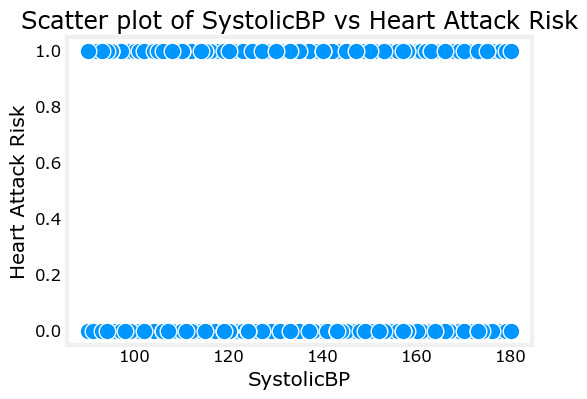

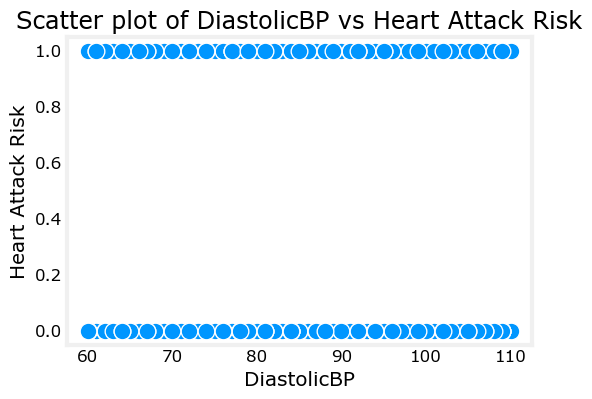

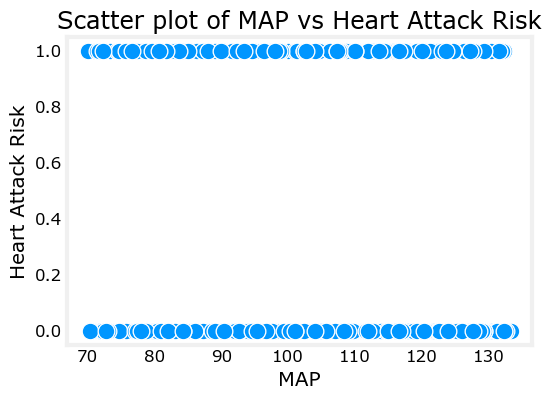

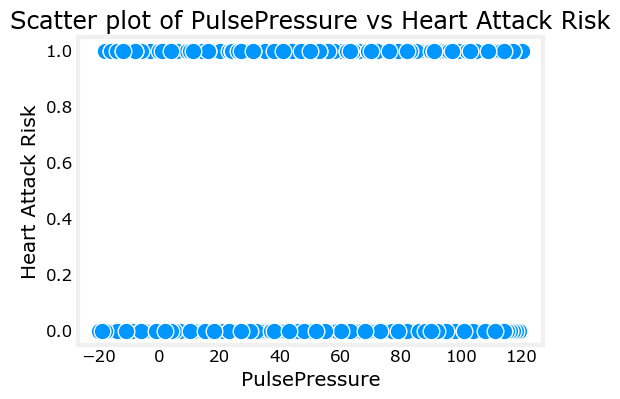

In [17]:
features = resampled_data.drop(['Heart Attack Risk','Patient ID','Blood Pressure','Continent','Country','Hemisphere'], axis=1)

# Plotting scatter plots for each feature against the target variable
for column in features.columns:
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    sns.scatterplot(data=resampled_data, x=column, y='Heart Attack Risk')
    plt.title(f"Scatter plot of {column} vs Heart Attack Risk")
    plt.xlabel(column)
    plt.ylabel('Heart Attack Risk')
    plt.show()

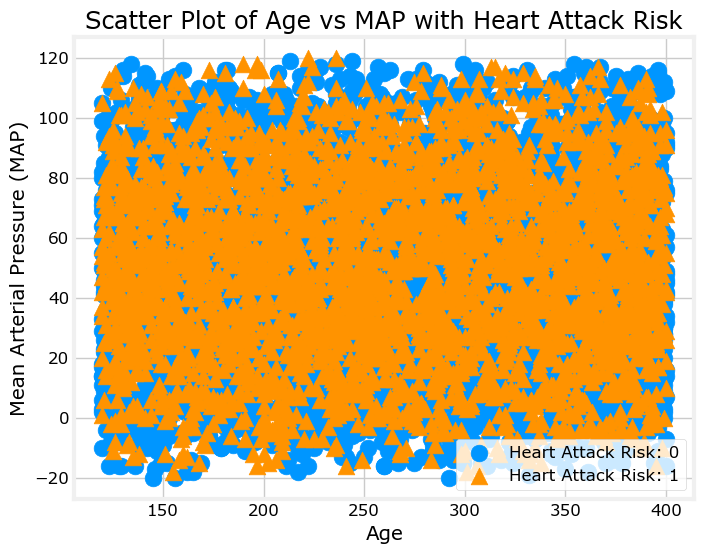

In [18]:
# Assuming 'Age', 'MAP', and 'Heart Attack Risk' are columns in your DataFrame
# 'Heart Attack Risk' contains categorical values (e.g., 0 and 1)

plt.figure(figsize=(8, 6))

# Separate data points based on 'Heart Attack Risk'
for risk, marker in zip(df['Heart Attack Risk'].unique(), ['o', '^']):
    subset = df[df['Heart Attack Risk'] == risk]
    plt.scatter(subset['Cholesterol'], subset['PulsePressure'], marker=marker, label=f'Heart Attack Risk: {risk}')

plt.xlabel('Age')
plt.ylabel('Mean Arterial Pressure (MAP)')
plt.title('Scatter Plot of Age vs MAP with Heart Attack Risk')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Country', 'Continent', 'Hemisphere']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


X = df.drop(columns=['Patient ID','Heart Attack Risk','Blood Pressure'])
y = df['Heart Attack Risk']


# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and cross-validation sets (60% train, 20% cross-validation)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Apply RandomOverSampler only to the training set
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [20]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train_oversampled)

In [21]:
# Initialize the class
logReg_model = LogisticRegression()


# Train the model
logReg_model.fit(X_train_scaled, y_train_oversampled)

LogisticRegression()

Age: 0.019240856109830038
Sex: 0.029984844767948406
Cholesterol: 0.042827910294107756
Heart Rate: -0.024066066785715812
Diabetes: 0.02993578887502721
Family History: -0.026987627228455238
Smoking: -0.02427366271091921
Obesity: -0.03877667334285718
Alcohol Consumption: -0.038151078287563554
Exercise Hours Per Week: 0.02424045638442769
Diet: -0.015202381321337092
Previous Heart Problems: 0.010687210681442724
Medication Use: -0.008394474256565298
Stress Level: -0.054306472915958776
Sedentary Hours Per Day: -0.030661412629236492
Income: -0.004913202584112235
BMI: 0.02194638196022001
Triglycerides: 0.02322486507356325
Physical Activity Days Per Week: -0.041171874845808976
Sleep Hours Per Day: -0.03330885546351456
Country: 0.0009709830865293413
Continent: -0.03017969072207794
Hemisphere: -0.014609315715243038
SystolicBP: 0.031283953155353914
DiastolicBP: 0.00916226988924034
MAP: 0.027551650226481973
PulsePressure: 0.02287629024723444


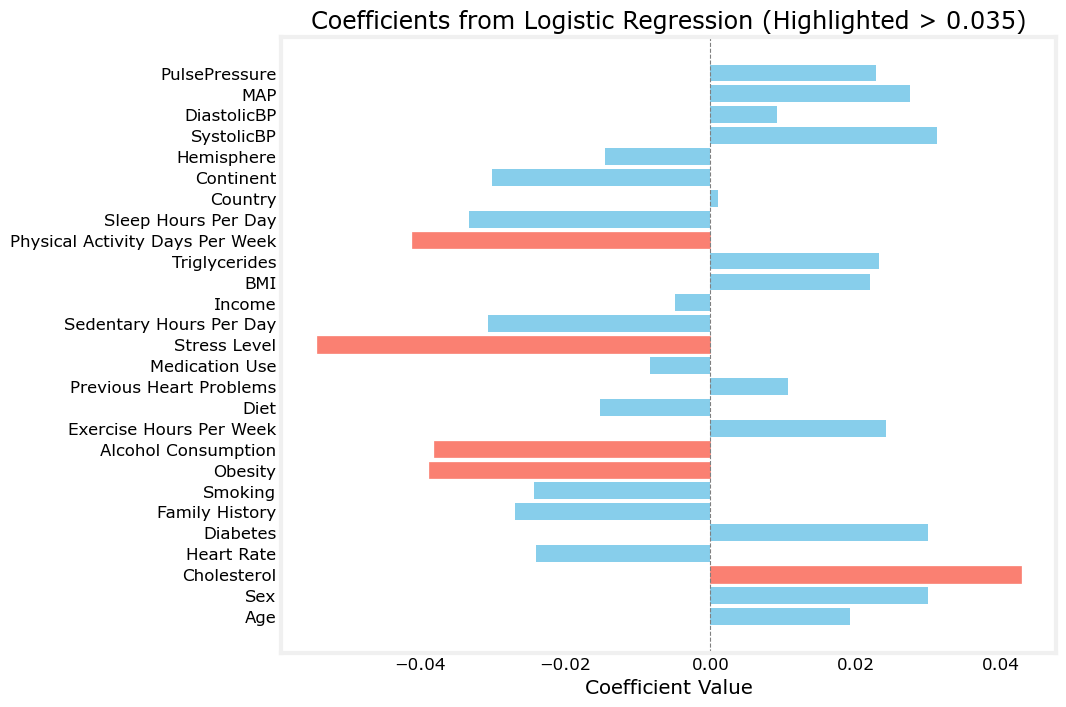

In [22]:
w_logReg = logReg_model.coef_[0]

for feature, parameter in zip(X.columns,w_logReg):
    print(f"{feature}: {parameter}")
    

#create a bar plot using Matplotlib to visualize these coefficients against their corresponding feature names
coefficients = w_logReg

# Plotting
plt.figure(figsize=(10, 8))

# Highlight color for bars with abs(coefficient )> 0.035
highlight_color1 = 'salmon'
# highlight_color2 = 'lightgreen'


# Plot all bars
bars = plt.barh(X.columns, coefficients, color='skyblue')

# Highlight bars with abs(coefficient) > 0.035
for idx, coef in enumerate(coefficients):
    if abs(coef) > 0.035:
        bars[idx].set_color(highlight_color1)
    # elif abs(coef) >= 0.03 :
    #     bars[idx].set_color(highlight_color2)
        

plt.xlabel('Coefficient Value')
plt.title('Coefficients from Logistic Regression (Highlighted > 0.035)')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)  # Adding a vertical line at 0
plt.show()


In [23]:
logistic_model = LogisticRegression(C=0.1, solver='liblinear', penalty='l2', class_weight='balanced')
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

Models = {
    'Logistic Regression': [logistic_model],
    'Random Forest': [random_forest_model],
    'Gradient Boosting': [gradient_boosting_model]
}

# Preprocessing the Data

In [40]:
# Encoding the categorical values
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Country', 'Continent', 'Hemisphere']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

selected_features = ['Cholesterol','Stress Level','Obesity','Alcohol Consumption','Physical Activity Days Per Week']
X = df[selected_features]
y = df['Heart Attack Risk']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and cross-validation sets (60% train, 20% cross-validation)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Apply RandomOverSampler only to the training set
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)



### Data Scalling

In [41]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train_oversampled)
X_cv_scaled = scaler_linear.transform(X_cv)
X_test_scaled = scaler_linear.transform(X_test)

# Logistic Regression

In [27]:
Models['Logistic Regression'][0].fit(X_train_oversampled,y_train_oversampled)

LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear')

### Model Evaluation

In [28]:
# Feed the scaled training set and get the predictions
yhat_train = Models['Logistic Regression'][0].predict(X_train_scaled)
# loss = log_loss(y_test, y_pred_proba)

# Use scikit-learn's utility function and divide by 2
print(f"training loss (using sklearn function): {log_loss(y_train_oversampled, yhat_train)}")

yhat_cv = Models['Logistic Regression'][0].predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation loss: {log_loss(y_cv, yhat_cv)}")

training loss (using sklearn function): 17.621222959498738
Cross validation loss: 20.58168684683757


## Confusion Matrix

In [29]:
yhat_test = Models['Logistic Regression'][0].predict(X_test_scaled)
# y_predictions = models[1].predict(X_test_mapped_scaled)

# evaluate model
accuracy = accuracy_score(y_test, yhat_test)
confusion = confusion_matrix(y_test, yhat_test)

# control precision and f1 score (zero division=1)
report = classification_report(y_test, yhat_test, zero_division=1)




print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.44266970907016545
Confusion Matrix:
[[324 801]
 [176 452]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.29      0.40      1125
           1       0.36      0.72      0.48       628

    accuracy                           0.44      1753
   macro avg       0.50      0.50      0.44      1753
weighted avg       0.55      0.44      0.43      1753



### Adding polynomial features up to degree=10

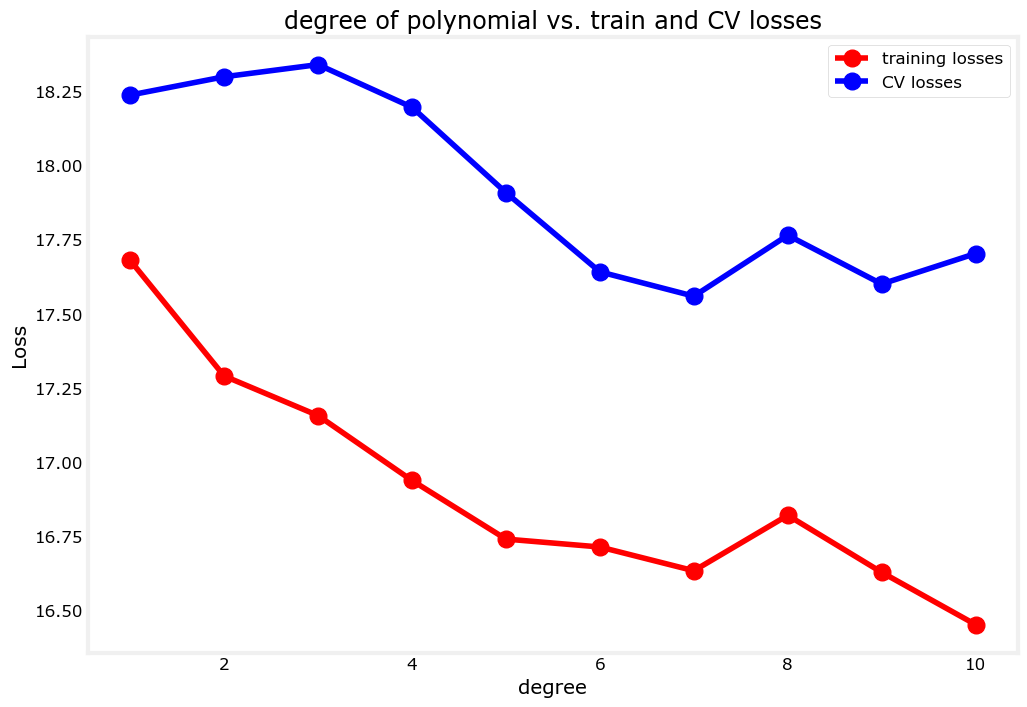

In [30]:
# Initialize lists containing the lists, models, and scalers
train_losses = []
cv_losses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train_oversampled)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = logReg_model = LogisticRegression(C=0.1, solver='liblinear', penalty='l1', class_weight='balanced')
    model.fit(X_train_mapped_scaled, y_train_oversampled )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_loss = log_loss(y_train_oversampled, yhat)
    train_losses.append(train_loss)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(X_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_loss = log_loss(y_cv, yhat)
    cv_losses.append(cv_loss)
    
# Plot the results
degrees=range(1,11)
def plot_train_cv_loss(degrees, train_losses, cv_losses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_losses, marker='o', c='r', label='training losses'); 
    plt.plot(degrees, cv_losses, marker='o', c='b', label='CV losses'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("Loss"); 
    plt.legend()
    plt.show()
    
plot_train_cv_loss(degrees, train_losses, cv_losses, title="degree of polynomial vs. train and CV losses")

### Choosing the model

In [31]:
degree = np.argmin(cv_losses) + 1
print(f"Lowest CV loss is found in the model with degree={degree}")

Lowest CV loss is found in the model with degree=7


In [32]:
# Add polynomial features to the test set

poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(X_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test loss
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_loss = log_loss(y_test, yhat) 

print(f"Training loss: {train_losses[degree-1]:.2f}")
print(f"Cross Validation loss: {cv_losses[degree-1]:.2f}")
print(f"Test loss: {test_loss:.2f}")

Training loss: 16.63
Cross Validation loss: 17.56
Test loss: 18.07


### Model Accuracy and Confusion Matrix

In [33]:
yhat_test = models[degree-1].predict(X_test_mapped_scaled)
# y_predictions = models[1].predict(X_test_mapped_scaled)

# evaluate model
accuracy = accuracy_score(y_test, yhat_test)
confusion = confusion_matrix(y_test, yhat_test)

# control precision and f1 score (zero division=1)
report = classification_report(y_test, yhat_test, zero_division=1)

Models['Logistic Regression'].append(accuracy)
Models['Logistic Regression'].append(confusion)
Models['Logistic Regression'].append(report)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.49857387335995434
Confusion Matrix:
[[551 574]
 [305 323]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.49      0.56      1125
           1       0.36      0.51      0.42       628

    accuracy                           0.50      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.50      0.51      1753



# Random Forest

In [55]:
Models['Random Forest'][0].fit(X_train_scaled, y_train_oversampled)

RandomForestClassifier(n_estimators=10, random_state=42)

### Model Evaluation

In [56]:
yhat_train = Models['Random Forest'][0].predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training loss (using sklearn function): {log_loss(y_train_oversampled, yhat_train)}")

# Feed the scaled cross validation set
yhat_cv = Models['Random Forest'][0].predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation loss: {log_loss(y_cv, yhat_cv)}")

training loss (using sklearn function): 0.9667903472777424
Cross validation loss: 16.613389582662098


### Model Accuracy and Confusion Matrix

In [57]:
# evaluate model
yhat_test = Models['Random Forest'][0].predict(X_test)
accuracy = accuracy_score(y_test, yhat_test)
confusion = confusion_matrix(y_test, yhat_test)

# control precision and f1 score (zero division=1)
report = classification_report(y_test, yhat_test, zero_division=1)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.6252139189960069
Confusion Matrix:
[[1056   69]
 [ 588   40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76      1125
           1       0.37      0.06      0.11       628

    accuracy                           0.63      1753
   macro avg       0.50      0.50      0.44      1753
weighted avg       0.54      0.63      0.53      1753



### Choosing Model

In [45]:
best_model = None
best_accuracy = 0  # Initialize with a low value for accuracy

for n_estimators in range(10, 200, 10):  # Example range of trees
    # Train Random Forest with a certain number of trees
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train_scaled, y_train_oversampled)
    
    # Evaluate on the validation set
    val_predictions = rf_model.predict(X_cv_scaled)
    val_accuracy = accuracy_score(y_cv, val_predictions)
    
    # Check for improvement or early stopping condition
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = rf_model
    else:
        # If performance doesn't improve, stop training
        break
best_model,best_accuracy 

(RandomForestClassifier(n_estimators=10, random_state=42), 0.5390758699372504)

In [59]:
# Feed the scaled training set and get the predictions
yhat_train = best_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training loss (using sklearn function): {log_loss(y_train_oversampled, yhat_train)}")

# Feed the scaled cross validation set
yhat_cv = best_model.predict(X_cv_scaled)
# Use scikit-learn's utility function and divide by 2
print(f"Cross validation loss: {log_loss(y_cv, yhat_cv)}")

yhat_test = best_model.predict(X_test_scaled)
test_loss = log_loss(y_test, yhat_test)
print(f"test_loss: {test_loss}")

Models['Random Forest'][0] = best_model

training loss (using sklearn function): 0.9667903472777424
Cross validation loss: 16.613389582662098
test_loss: 16.14048369107642


### Model Accuracy and Confusion Matrix

In [60]:
# evaluate model

accuracy = accuracy_score(y_test, yhat_test)
confusion = confusion_matrix(y_test, yhat_test)

# control precision and f1 score (zero division=1)
report = classification_report(y_test, yhat_test, zero_division=1)

Models['Random Forest'].append(accuracy)
Models['Random Forest'].append(confusion)
Models['Random Forest'].append(report)


print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)




Accuracy: 0.5521962350256703
Confusion Matrix:
[[750 375]
 [410 218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1125
           1       0.37      0.35      0.36       628

    accuracy                           0.55      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.55      0.55      0.55      1753



# Gradient Boosting

In [61]:
Models['Gradient Boosting'][0].fit(X_train_scaled, y_train_oversampled)

GradientBoostingClassifier(random_state=42)

In [62]:
# Feed the scaled training set and get the predictions
yhat_train = Models['Gradient Boosting'][0].predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training loss (using sklearn function): {log_loss(y_train_oversampled, yhat_train)}")

# Feed the scaled cross validation set
yhat_cv = Models['Gradient Boosting'][0].predict(X_cv_scaled)
# Use scikit-learn's utility function and divide by 2
print(f"Cross validation loss: {log_loss(y_cv, yhat_cv)}")

training loss (using sklearn function): 13.97839966202128
Cross validation loss: 18.2377185146303


### Adding Polynomial Features

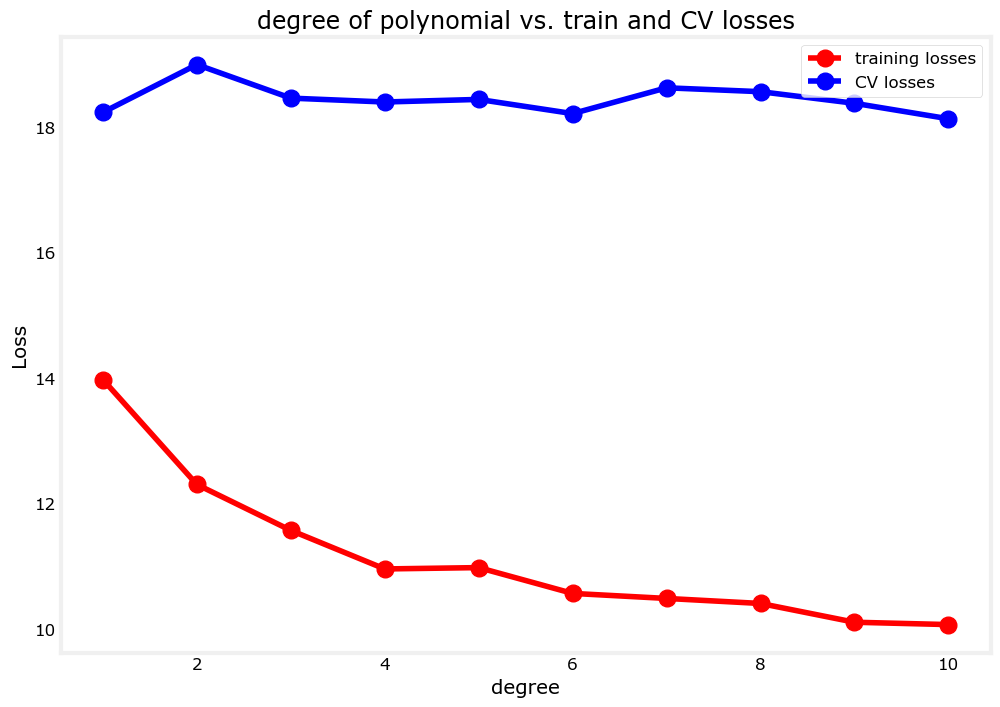

In [63]:
# Initialize lists containing the lists, models, and scalers
train_losses = []
cv_losses = []
models = []
scalers = []

# Loop over 4 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train_oversampled)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_mapped_scaled, y_train_oversampled )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_loss = log_loss(y_train_oversampled, yhat)
    train_losses.append(train_loss)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(X_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_loss = log_loss(y_cv, yhat)
    cv_losses.append(cv_loss)
    
    
# Plot the results

degrees=range(1,11)
def plot_train_cv_loss(degrees, train_losses, cv_losses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_losses, marker='o', c='r', label='training losses'); 
    plt.plot(degrees, cv_losses, marker='o', c='b', label='CV losses'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("Loss"); 
    plt.legend()
    plt.show()
    
plot_train_cv_loss(degrees, train_losses, cv_losses, title="degree of polynomial vs. train and CV losses")

In [64]:
degree = np.argmin(cv_losses) + 1
print(f"Lowest CV loss is found in the model with degree={degree}")

Lowest CV loss is found in the model with degree=10


In [65]:
# Add polynomial features to the test set

poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(X_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test loss
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_loss = log_loss(y_test, yhat) 

print(f"Training loss: {train_losses[degree-1]:.2f}")
print(f"Cross Validation loss: {cv_losses[degree-1]:.2f}")
print(f"Test loss: {test_loss:.2f}")

Training loss: 10.07
Cross Validation loss: 18.13
Test loss: 17.79


### Model Accuracy and Confusion Matrix

In [66]:
yhat_test = models[degree-1].predict(X_test_mapped_scaled)
# y_predictions = models[1].predict(X_test_mapped_scaled)

# evaluate model
accuracy = accuracy_score(y_test, yhat_test)
confusion = confusion_matrix(y_test, yhat_test)

# control precision and f1 score (zero division=1)
report = classification_report(y_test, yhat_test, zero_division=1)

Models['Gradient Boosting'].append(accuracy)
Models['Gradient Boosting'].append(confusion)
Models['Gradient Boosting'].append(report)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.50656018254421
Confusion Matrix:
[[586 539]
 [326 302]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.52      0.58      1125
           1       0.36      0.48      0.41       628

    accuracy                           0.51      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.51      0.52      1753

